# Small Project 

# Title - Analysis of Airline Passenger Trends Using Fourier Transform and Power Spectrum 

# Student Name : Dharmendrakumar Reddy Rayapureddy
# Student_ID : 23084698

In [20]:
import numpy as np # import numpy library
import pandas as pd #import pandas library
import matplotlib.pyplot as plt #import matplotlib library 

In [21]:
# Step A: Load the dataset
file_path = "C:\\Users\\dharm\\Downloads\\airline9.csv"  # Replace with the correct file path
airline_9 = pd.read_csv(file_path)


In [22]:
airline_9

,Day,Date,Number,Price,Revenue
0,0,2021-01-01,6.8230,44.90,306.3531
1,1,2021-01-02,5.2025,44.33,230.6245
2,2,2021-01-03,7.2805,45.06,328.0668
3,3,2021-01-04,3.1235,43.60,136.1795
4,4,2021-01-05,1.1527,42.91,49.4567
...,...,...,...,...,...
725,725,2022-12-27,12.0511,46.74,563.2507
726,726,2022-12-28,15.7096,48.03,754.4628
727,727,2022-12-29,15.3975,47.92,737.7811
728,728,2022-12-30,17.9457,48.81,875.9630


In [23]:
airline_9['Date'] = pd.to_datetime(airline_9['Date']) #convert the date to datetime..
airline_9.set_index('Date', inplace=True) # setting index date..

In [24]:
airline_9 # print the Value.

,Day,Number,Price,Revenue
Date,,,,
2021-01-01,0,6.8230,44.90,306.3531
2021-01-02,1,5.2025,44.33,230.6245
2021-01-03,2,7.2805,45.06,328.0668
2021-01-04,3,3.1235,43.60,136.1795
2021-01-05,4,1.1527,42.91,49.4567
...,...,...,...,...
2022-12-27,725,12.0511,46.74,563.2507
2022-12-28,726,15.7096,48.03,754.4628
2022-12-29,727,15.3975,47.92,737.7811


In [25]:
airline_9.describe()

,Day,Number,Price,Revenue
count,730.000000,730.000000,730.000000,730.000000
mean,364.500000,11.800000,46.650342,556.492081
std,210.877136,4.139313,1.455836,211.156428
min,0.000000,1.152700,42.910000,49.456700
25%,182.250000,9.128325,45.710000,417.260600
50%,364.500000,12.045900,46.740000,562.987150
75%,546.750000,14.586050,47.630000,694.737075
max,729.000000,26.805100,51.930000,1391.932900


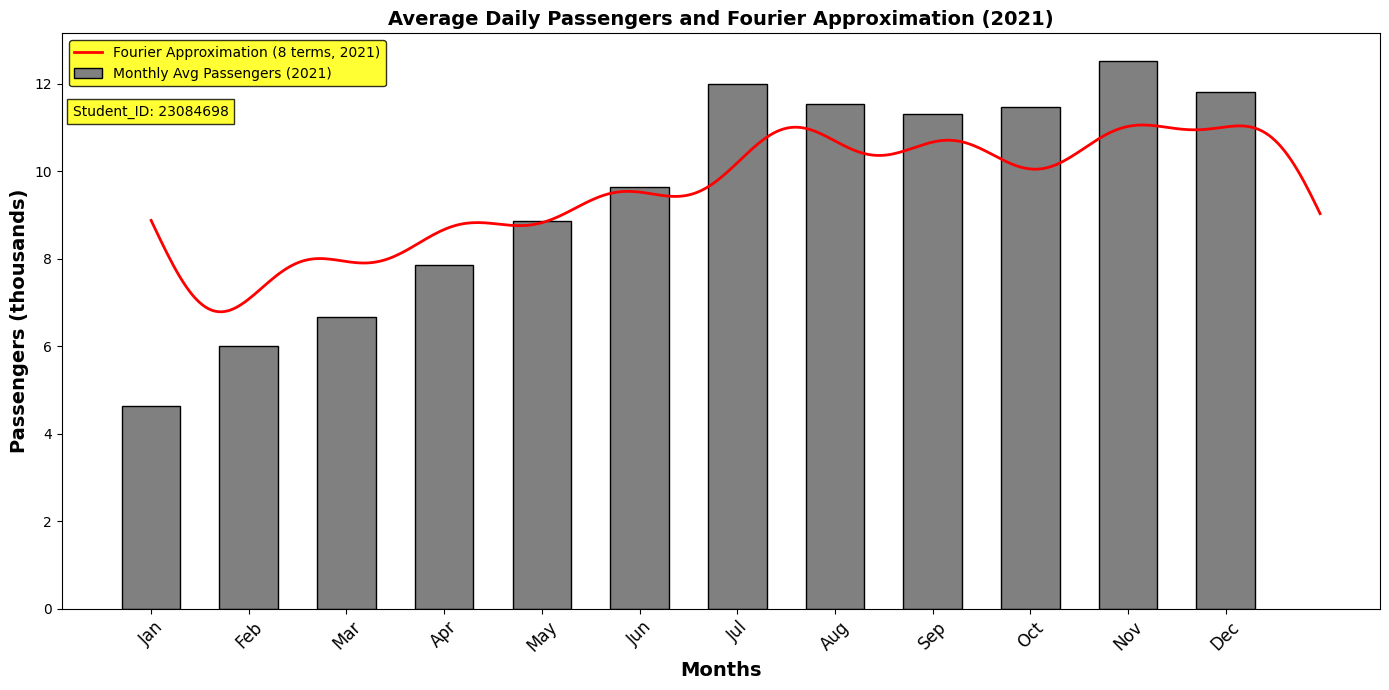

In [29]:

data_2021 = airline_9[airline_9.index.year == 2021].copy() # getting data for 2021..

daily_passengers_2021 = data_2021['Number'].values # daily passengers numbers for 2021..

n_2021 = len(daily_passengers_2021) # length of the passengers in the year 2021.

fourier_transform_2021 = np.fft.fft(daily_passengers_2021) # perform fourier transform on the year 2021 data.

frequencies_2021 = np.fft.fftfreq(n_2021, d=1)  # d=1 assumes daily data

time_points = np.arange(n_2021)  # Time points

k_values = np.arange(8)  # First 8 terms 

cos_terms = np.cos(2 * np.pi * frequencies_2021[k_values, None] * time_points)

sin_terms = np.sin(2 * np.pi * frequencies_2021[k_values, None] * time_points)

real_parts = np.real(fourier_transform_2021[k_values])

imaginary_parts = -np.imag(fourier_transform_2021[k_values])

fourier_approximation = np.sum(2 * real_parts[:, None] * cos_terms + 2 * imaginary_parts[:, None] * sin_terms,axis=0) # Compute the Fourier series approximation..

fourier_approximation_normalized = fourier_approximation * (daily_passengers_2021.mean() / fourier_approximation.mean()) # Normalize Fourier series to match the scale of the bar chart..

data_2021['month'] = data_2021.index.month # calulate monthly averages for 2021 data..

monthly_avg_passengers_2021 = data_2021.groupby('month')['Number'].mean()

# plot the bar chart..
plt.figure(figsize=(14, 7))

plt.bar(range(1, 13), monthly_avg_passengers_2021, color='grey', edgecolor='black', label='Monthly Avg Passengers (2021)',width=0.6) # Plot the bar chart for monthly averages

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12, rotation=45) # adding x-ticks..

plt.plot(np.arange(n_2021) / (n_2021 / 12) + 1, fourier_approximation_normalized,color='red',linewidth=2,label='Fourier Approximation (8 terms, 2021)') # caluculate the fourier series 

plt.xlabel('Months', fontsize=14,fontweight = "bold") # Adding X-label..

plt.ylabel('Passengers (thousands)', fontsize=14,fontweight = "bold") # Adding Y-label..

plt.title('Average Daily Passengers and Fourier Approximation (2021)', fontsize=14,fontweight = "bold") #Title of the Graph

plt.legend(loc='upper left',facecolor='yellow',edgecolor = 'black') #Add legend

plt.text(0.2, max(monthly_avg_passengers_2021) * 0.90,"Student_ID: 23084698", fontsize=10, ha='left', bbox=dict(facecolor='yellow', alpha=0.8)) # Adding student_ID Number on the Graph..

plt.tight_layout() # Adjust the figure..

plt.savefig('fourier_series_2021_corrected.png', dpi=300) # Save the image in png..

plt.show() # Display the graph..


# Calculating Power Spectrum from one week to one year and plotting the bar chart..

# Calculating the number of Passengers travelled in 2022(X) and the length of the main period(Y)

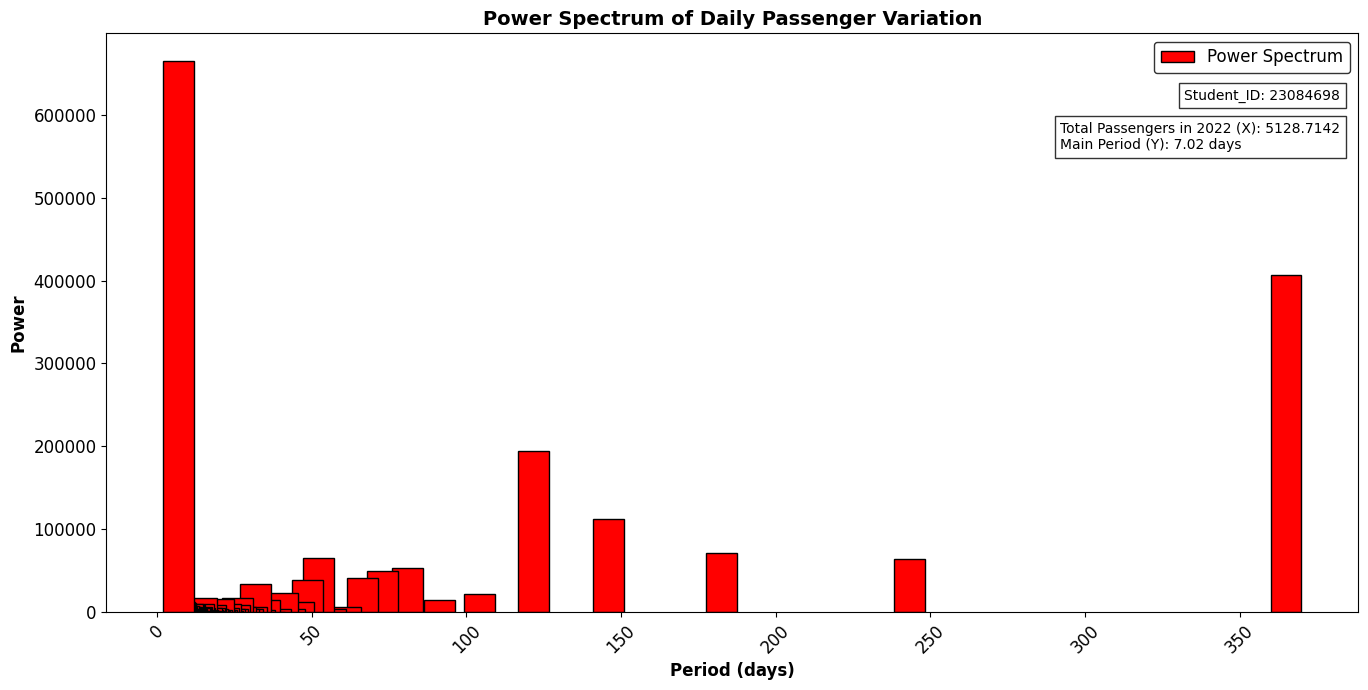

Total passengers in 2022 (X): 5128.7142
Main period (Y): 7.02 days


<Figure size 640x480 with 0 Axes>

In [28]:

daily_passengers = airline_9['Number'].values  # 'Number' column contains passengers data

passengers_2022 = airline_9[airline_9.index.year == 2022]['Number'].sum() # Calculating Total number of passengers in the year 2021...

n = len(daily_passengers) # Calculating the Fourier Transform

fourier_transform = np.fft.fft(daily_passengers) 

frequencies = np.fft.fftfreq(n, d=1)  # d=1 is daily data

# Calculate power spectrum
power_spectrum = np.abs(fourier_transform[:n//2])**2  # Use only the positive frequencies
positive_frequencies = frequencies[:n//2]  # Positive frequencies (1/day)


periods = 1 / positive_frequencies[1:]  #Convert the frequencies to periods from 1

power_spectrum = power_spectrum[1:]  # Convert the frequencies to periods from 1

valid_indices = (periods >= 7) & (periods <= 365) # Calculating periods for a week and Year..

periods = periods[valid_indices]

power_spectrum = power_spectrum[valid_indices]

# Step 4: Find the main period (Y)

max_power_index = np.argmax(power_spectrum)  # Index of the highest power

main_period = periods[max_power_index]  # Period corresponding to the highest power

# Step 5: Plot the power spectrum and annotate with X and Y

plt.figure(figsize=(14, 7)) # Size of the Figure

plt.bar(periods, power_spectrum, width=10, color='red', edgecolor='black', label='Power Spectrum') #Bar plot with Width,color,label..

plt.xlabel('Period (days)', fontsize=12,fontweight="bold") # X- Label with size and thickess

plt.ylabel('Power', fontsize=12,fontweight = "bold") # Y- Label with size and thickess..

plt.title('Power Spectrum of Daily Passenger Variation', fontsize=14,fontweight = "bold") #Adding Title with size

plt.xticks(fontsize=12,rotation = 45) # Adding Y-ticks with size and rotate 45 degrees

plt.yticks(fontsize=12) # Adding Y-ticks with size

text = f"Total Passengers in 2022 (X): {passengers_2022}\nMain Period (Y): {main_period:.2f} days" # writing a text values of x and y...

plt.text(max(periods) * 0.8, max(power_spectrum) * 0.84, text, fontsize=10, ha='left', bbox=dict(facecolor='white', alpha=0.8)) # Adding X and Y values on the Graph..

plt.text(max(periods) * 0.91, max(power_spectrum) * 0.93, 'Student_ID: 23084698', fontsize=10,bbox=dict(facecolor='white', alpha=0.8)) # Adding student ID on the Graph..

plt.legend(loc='upper right',fontsize= 12,facecolor = "white",edgecolor = "black") # Add legend with location and size


plt.tight_layout() # Adjusting the Graph...

plt.show() # Show the Graph...

print(f"Total passengers in 2022 (X): {passengers_2022}") #Print X- value means Total passengers.

print(f"Main period (Y): {main_period:.2f} days") #Print Y- Value means length of the main period.

plt.savefig('figure2_power_spectrum_with_X_Y.png', dpi=300) # saving the image.